## Group members

1.   Myra Lugwiri
2.   Topister Onyango



#### Data Source
> Data made available for the financial inclusion in Africa competition on the platform Zindi https://zindi.africa/competitions/financial-inclusion-in-africa/data



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the data
train_data = pd.read_csv('/content/drive/MyDrive/Machine_Learning/assignments/competition/financial_inclusion/Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Machine_Learning/assignments/competition/financial_inclusion/Test.csv')


In [ ]:
#looking into the data
train_data.head()


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#assessing the data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
# looking into the statistical summary
train_data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
#checking for missing values
train_data.isnull().sum()


country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
#checking for missing values in the training data
test_data.isnull().sum()


country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
# Drop the 'uniqueid' column as it is not relevant for modeling
train_data = train_data.drop('uniqueid', axis=1)
test_data = test_data.drop('uniqueid', axis=1)

### Feature Engineering
> Before proceeding to train the model we will perform feature engineering on the dataset.
1. We will create new columns from existing one e.g we willl create the column 'age_group' through the process of binning 'age_of_respondent'
2. We will encode categorical columns
3. we will standardise the data

In [ ]:
#converting the target variable to numeric (0 for 'No', 1 for 'Yes')
label_encoder = LabelEncoder()
train_data['bank_account'] = label_encoder.fit_transform(train_data['bank_account'])


In [ ]:
# creating new columns by binning the age of the respondents
train_data['age_group'] = pd.cut(train_data['age_of_respondent'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])
test_data['age_group'] = pd.cut(test_data['age_of_respondent'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country                 23524 non-null  object  
 1   year                    23524 non-null  int64   
 2   bank_account            23524 non-null  int64   
 3   location_type           23524 non-null  object  
 4   cellphone_access        23524 non-null  object  
 5   household_size          23524 non-null  int64   
 6   age_of_respondent       23524 non-null  int64   
 7   gender_of_respondent    23524 non-null  object  
 8   relationship_with_head  23524 non-null  object  
 9   marital_status          23524 non-null  object  
 10  education_level         23524 non-null  object  
 11  job_type                23524 non-null  object  
 12  age_group               23524 non-null  category
dtypes: category(1), int64(4), object(8)
memory usage: 2.2+ MB


In [ ]:
# Drop the original 'age_of_respondent' column since we have 'age_group'
train_data = train_data.drop(['age_of_respondent'], axis=1)
test_data = test_data.drop(['age_of_respondent'], axis=1)

In [ ]:
# creating a list of columns with object data type
object_columns = train_data.select_dtypes(include=['object', 'category']).columns.tolist()


In [ ]:
# performing one-hot-encoding
def encoding_data(data, object_columns):
  encoder = OneHotEncoder(sparse=False, drop='first')
  encoded_data = encoder.fit_transform(data[object_columns])

  #converting the encoded data into a DataFrame
  encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(object_columns))
  encoded_df = pd.concat([data.drop(columns=object_columns), encoded_df], axis=1)
  return encoded_df

# one-hot-encoding the train and test data
train_data_encoded = encoding_data(train_data, object_columns)
test_data_encoded = encoding_data(test_data, object_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 35 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   year                                             23524 non-null  int64  
 1   bank_account                                     23524 non-null  int64  
 2   household_size                                   23524 non-null  int64  
 3   country_Rwanda                                   23524 non-null  float64
 4   country_Tanzania                                 23524 non-null  float64
 5   country_Uganda                                   23524 non-null  float64
 6   location_type_Urban                              23524 non-null  float64
 7   cellphone_access_Yes                             23524 non-null  float64
 8   gender_of_respondent_Male                        23524 non-null  float64
 9   relationship_with_head_Head 

In [ ]:
#splitting the data
X = train_data_encoded.drop('bank_account', axis=1)
y = train_data_encoded['bank_account']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#### Model Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Train individual models
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
xgboost_model = XGBClassifier(random_state=42)

In [ ]:
random_forest_model.fit(X_train_scaled, y_train)
gradient_boosting_model.fit(X_train_scaled, y_train)
xgboost_model.fit(X_train_scaled, y_train)

#combining predictions using a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('Random Forest', random_forest_model),
        ('Gradient Boosting', gradient_boosting_model),
        ('XGBoost', xgboost_model)
    ],
    voting='hard'
)

In [ ]:
#training the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

#evaluating the validation set
ensemble_predictions = ensemble_model.predict(X_val_scaled)
ensemble_accuracy = accuracy_score(y_val, ensemble_predictions)

print("Accuracy on the validation set with Ensemble Model:", ensemble_accuracy)


Accuracy on the validation set with Ensemble Model: 0.8886291179596174


In [ ]:
# each models' performance
models = {
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'XGBoost': xgboost_model
}


Accuracy for Random Forest: 0.8716
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      4063
           1       0.54      0.39      0.45       642

    accuracy                           0.87      4705
   macro avg       0.72      0.67      0.69      4705
weighted avg       0.86      0.87      0.86      4705



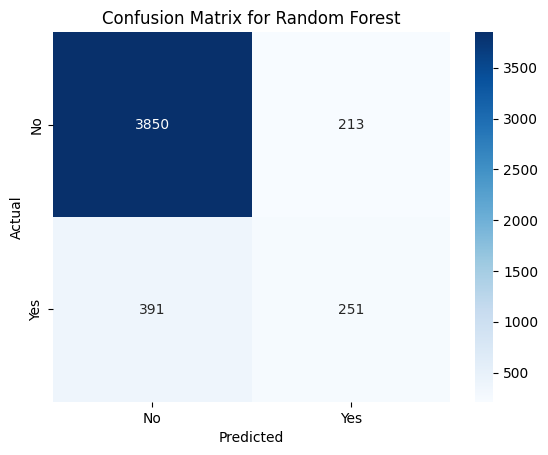


Accuracy for Gradient Boosting: 0.8905
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      4063
           1       0.71      0.33      0.46       642

    accuracy                           0.89      4705
   macro avg       0.81      0.66      0.70      4705
weighted avg       0.88      0.89      0.87      4705



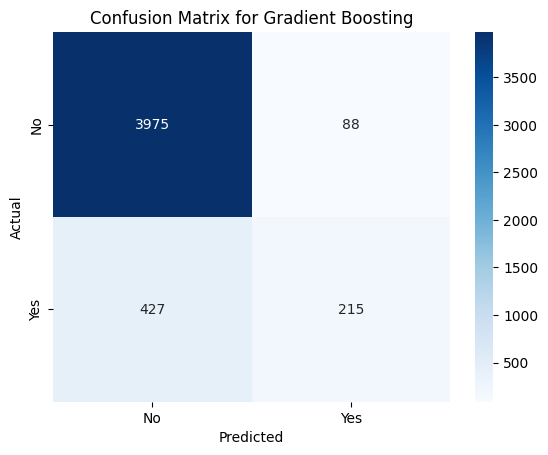


Accuracy for XGBoost: 0.8886
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      4063
           1       0.65      0.40      0.49       642

    accuracy                           0.89      4705
   macro avg       0.78      0.68      0.72      4705
weighted avg       0.87      0.89      0.88      4705



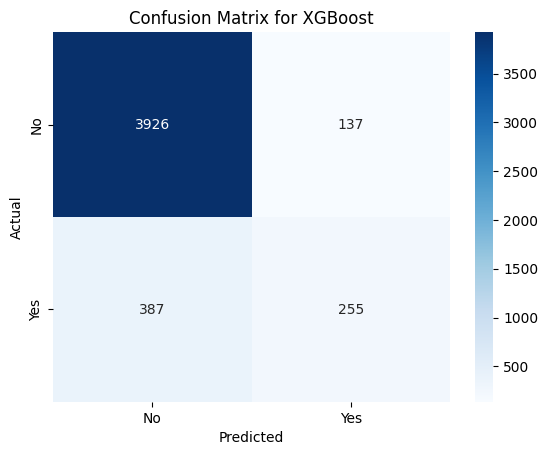

In [ ]:
for model_name, model in models.items():
    predictions = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, predictions)

    print(f"\nAccuracy for {model_name}: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_val, predictions))

    #confusion Matrix
    conf_matrix = confusion_matrix(y_val, predictions)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [ ]:
#evaluating the ensemble model on the validation set
ensemble_predictions = ensemble_model.predict(X_val_scaled)
ensemble_accuracy = accuracy_score(y_val, ensemble_predictions)

print("Accuracy on the validation set with Ensemble Model:", ensemble_accuracy)


Accuracy on the validation set with Ensemble Model: 0.8886291179596174


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_model.fit(X_train_scaled, y_train)

# Evaluate on the validation set
best_rf_predictions = best_rf_model.predict(X_val_scaled)
best_rf_accuracy = accuracy_score(y_val, best_rf_predictions)
print("Accuracy on the validation set with the best Random Forest model:", best_rf_accuracy)


Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy on the validation set with the best Random Forest model: 0.8890541976620616


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


Accuracy for XGBoost: 0.8895
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      4063
           1       0.69      0.35      0.46       642

    accuracy                           0.89      4705
   macro avg       0.80      0.66      0.70      4705
weighted avg       0.87      0.89      0.87      4705



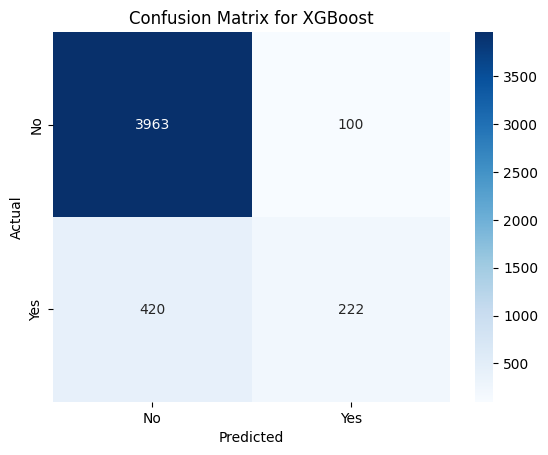

In [ ]:
#Training a  GradientBoostingClassifier model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=200, min_samples_split=10, random_state=42)
gradient_boosting_model.fit(X_train_scaled, y_train)
predictions = gradient_boosting_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, predictions)

print(f"\nAccuracy for {model_name}: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_val, predictions))

#Confusion Matrix
conf_matrix = confusion_matrix(y_val, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

In [ ]:
print(conf_matrix)

[[3963  100]
 [ 420  222]]


Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 15}
Validation accuracy: 0.8903
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      4063
           1       0.72      0.32      0.45       642

    accuracy                           0.89      4705
   macro avg       0.81      0.65      0.69      4705
weighted avg       0.88      0.89      0.87      4705



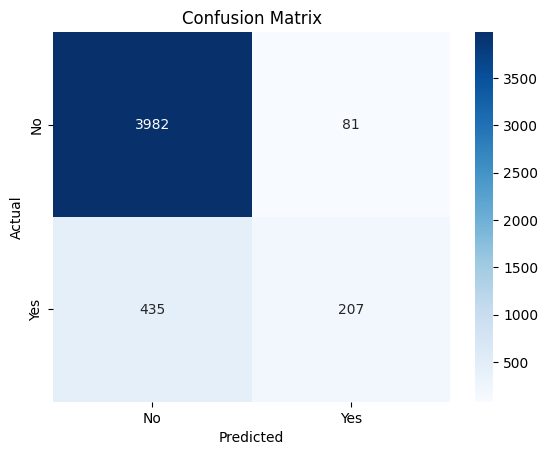

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#The parameter grid to search
param_grid = {
    'n_estimators': [10, 15, 20],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

#Initializing the GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

#Initializing GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=2)

#Performing GridSearchCV
grid_search.fit(X_train_scaled, y_train)

#getting the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

#Using the best estimator to make predictions
predictions = best_estimator.predict(X_val_scaled)

#evaluating the model
accuracy = accuracy_score(y_val, predictions)
print(f"Best parameters: {best_params}")
print(f"Validation accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_val, predictions))

#confusion Matrix
conf_matrix = confusion_matrix(y_val, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
print(conf_matrix)

[[3982   81]
 [ 435  207]]


Insights from the confusion matrix

> GradientBoostingClassifier confusion matrix[[3982   81]
 [ 435  207]]

>XGBoostClassifier confusion matrix [[3963  100]
 [ 420  222]]

> The classsifiers XGBoostClassifier and GradientBoostingClassifier achieved relatively similar True Negative (TN) values, indicating a high number of correct predictions for individuals without a bank account. However, the GBC achieved a lower False Positive (FP) rate compared to the XGBoostClassifier, which means it made fewer incorrect predictions of individuals having a bank account when they do not.

> Considering the implications of false positives in this context missing the opportunity to ensure inclusivity of individuals who do not have a bank account—the GradientBoostingClassifier's lower false positive rate suggests that it is better suited for improving the efficiency of resource allocation in ensuring individuals who do not have access to bank accounts are reached out  to and the bank tailoring solutions best fit for them. Therefore, the Gradient Boosting Classifier appears to be the most suitable choice for predicting whether someone has a bank account or not.

> In summary, the Gradient Boosting Classifier offers higher precision, making it the most ideal choice for this classification task based on the provided confusion matrices.

In [ ]:
# Evaluating the model with MAE and RMSE
mae = mean_absolute_error(y_val, predictions)
rmse = mean_squared_error(y_val, predictions, squared=False)  # Computing RMSE by setting squared=False

print(f"Validation MAE: {mae:.4f}")
print(f"Validation RMSE: {rmse:.4f}")

Validation MAE: 0.1097
Validation RMSE: 0.3312


### Validation MAE: 0.1097

This means, on average, the absolute difference between the actual and predicted values is approximately 0.1097 units. Lower MAE values indicate better model performance, hence our model is performing well.

### Validation RMSE: 0.3312

RMSE provides a measure of the spread of prediction errors. In this case, the RMSE is approximately 0.3312 units. Lower RMSE values indicate better fit to the data.

In conclusion, these metrics suggest that our Gradient Boosting model is performing reasonably well in making predictions on the validation set.

#### Conclusion
> The model we are working with is gradient_boosting_model because it has the highest accuracy of 89% compared to the other models. Hence, it signifies its effectiveness in capturing the complexities of the underlying data and making accurate predictions.